In [1]:
!pip install SQLAlchemy

In [2]:
from sqlalchemy import create_engine

In [3]:
engine=create_engine('sqlite:///db_bello_customers.db')

In [5]:
connect = engine.connect() # connects database
type(connect) # creates a database file

sqlalchemy.engine.base.Connection

In [7]:
import pandas as pd
df=pd.read_sql_table('Payments',connect)

In [4]:
from sqlalchemy.engine.reflection import Inspector
inspector = Inspector(engine)
inspector.get_table_names()

C:\Users\navan\AppData\Local\Temp/ipykernel_8832/1299425654.py:2: SADeprecationWarning: The __init__() method on Inspector is deprecated and will be removed in a future release.  Please use the sqlalchemy.inspect() function on an Engine or Connection in order to acquire an Inspector. (deprecated since: 1.4)
  inspector = Inspector(engine)


['Payments']

In [8]:
df.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [9]:
df.to_csv("db_file.csv",index=False)

In [10]:
df2 = pd.read_excel("lcl_bello_sales.xlsx")

In [11]:
df2.head()

,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [14]:
#read from csv file
df3=pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')

In [15]:
df3.head()

,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


In [16]:
df2.drop(columns="CustomerID",inplace=True)
df3.drop(columns="CustomerID",inplace=True)

In [17]:
data = pd.concat([df,df2,df3], axis=1)
data.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode
0,16/08/20,10471,Creditcard,Economy,Female,17.0,₹ 675036.2138626401,coates,1 start,8736,Creditcard
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0,"€ 2,315.53",dresses,2 star,8547,Ewallet
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0,₹ 611426.29122378,NaN,2 star,9833,Prepaid Card
3,None,10474,Directdeposit,Normal,Female,2133.0,₹ 210869.48083470002,dresses,2star,7591,Directdeposit
4,24/08/20,10475,None,Economy,Male,2133.0,₹ 679422.2811434,pantas,1 start,5131,NaN


In [18]:
data.to_csv("single_source.csv") # Raw data

In [20]:
data.duplicated().any()

True

In [21]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [24]:
data[data["CustomerID"] == 10471]

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode
0,16/08/20,10471,Creditcard,Economy,Female,17.0,₹ 675036.2138626401,coates,1 start,8736,Creditcard


In [23]:
data["CustomerID"] == 10471

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: CustomerID, Length: 100, dtype: bool

In [25]:
data[data.duplicated()]

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode
88,31/08/20,10558,Credit Card,Normal,Unspecified,11.0,₹ 234895.78095268,coates,5 star,7007,Credit Card
89,31/08/20,10558,Credit Card,Normal,Unspecified,11.0,₹ 234895.78095268,coates,5 star,7007,Credit Card


In [26]:
data[data["CustomerID"] == 10558]

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode
87,31/08/20,10558,Credit Card,Normal,Unspecified,11.0,₹ 234895.78095268,coates,5 star,7007,Credit Card
88,31/08/20,10558,Credit Card,Normal,Unspecified,11.0,₹ 234895.78095268,coates,5 star,7007,Credit Card
89,31/08/20,10558,Credit Card,Normal,Unspecified,11.0,₹ 234895.78095268,coates,5 star,7007,Credit Card


In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data[data.duplicated()] # Duplicate entries have been removed

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode


## Box & Whisker Plot

https://students.flinders.edu.au/content/dam/student/slc/box-and-whisker-plots.pdf

<AxesSubplot:>

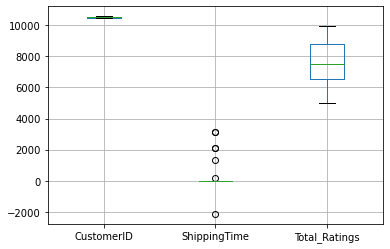

In [29]:
data.boxplot()

In [31]:
q1 = data["ShippingTime"].quantile(.25)
q3 = data["ShippingTime"].quantile(.75)
IQR = q3 - q1
IQR

9.0

In [32]:
q2 = data["ShippingTime"].median()
q2

13.0

In [41]:
# Outlier
# less than Q1-1.5*IQR
# more than Q3 + 1.5*IQR

outlier_lower = (data["ShippingTime"] < (q1 - 1.5 * IQR))
outlier_higher =  (data["ShippingTime"] > (q3 + 1.5 * IQR))
outlier = data[outlier_lower | outlier_higher]
outlier

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime,Price,ProductType,Rating,Total_Ratings,PaymentMode
3,None,10474,Directdeposit,Normal,Female,2133.0,₹ 210869.48083470002,dresses,2star,7591,Directdeposit
4,24/08/20,10475,None,Economy,Male,2133.0,₹ 679422.2811434,pantas,1 start,5131,NaN
27,19/08/20,10498,Direct Deposit,Express,Unspecified,213.0,₹ 635118.07344224,Coats/Jackets,3 star,9297,Direct Deposit
43,14/08/20,10514,Credit Card,Express,Unspecified,1321.0,"€ 7,261.79",dresses,5 star,5567,Credit Card
59,17/08/20,10530,Cash,Economy,Female,3113.0,"$8,670.69",Cardigan,4 star,6930,Cash
71,20/08/20,10542,Cash,Mail,Male,3132.0,₹ 708227.40839738,Hats,2star,9157,Cash
98,26/08/20,10569,Directdeposit,Economy,Male,-2131.0,£ 4118.0053827500005,Pants,5 star,5200,Directdeposit


In [39]:
outlier_higher

0     False
1     False
2     False
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: ShippingTime, Length: 98, dtype: bool

In [42]:
outlier.index

Int64Index([3, 4, 27, 43, 59, 71, 98], dtype='int64')

In [43]:
data.drop(outlier.index, axis = 0, inplace=True)

<AxesSubplot:>

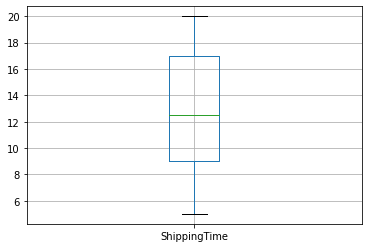

In [45]:
data.boxplot(column="ShippingTime")

In [ ]:
data.boxplot()